## Data load

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('smtph_total.csv')
df.head(5)

,Title,Link,Description,Blogger Name,Blogger Link,Post Date,Post Contents
0,"갤럭시 Z 플립과 한 달, 접는 스마트폰의 가치만 남다",https://chitsol.com/entry/galaxy_z_flip_review/,반으로 접을 수 있는 갤럭시 Z 플립이 접지 않는 스마트폰과 얼마나 다른 경험인가를...,https://chitsol.com/,https://chitsol.com/,20210712,NaN
1,스마트폰 삼각대 추천 내돈내산 리뷰,https://blog.naver.com/kimhw1020?Redirect=Log&...,그래서 스마트폰 삼각대 추천 하는 제품을 구매하게 된 것 같아요. 2018년 4월 ...,진돗개 솜이랑 언니랑,https://blog.naver.com/kimhw1020,20210720,\n\n\n\n\n\n\n솜이언니 일상\n\n\n\n\n스마트폰 삼각대 추천 내돈내...
2,귀여운 스마트폰 거치대 + 아이폰 케이스(다이소 비교),https://blog.naver.com/logix200?Redirect=Log&l...,스마트폰 거치대 홀더 &quot;아이폰 케이스도 졸.귀.탱&quot; 안녕하세요. ...,옥희돌이 칩시크족,https://blog.naver.com/logix200,20210802,\n\n\n\n\n\n\n일반 수령기\n\n\n\n\n귀여운 스마트폰 거치대 + 아...
3,"베스틴 원패스 스마트폰 어플, 아이파크 공동 현관문 핸드폰 연동",https://blog.naver.com/july7th73?Redirect=Log&...,"요즘 신축 아파트들은 대부분 IoT 스마트 기기들을 이용한 출입시스템을 도입, 각종...",수연아빠의 야구장 출동 (개포맘모스),https://blog.naver.com/july7th73,20210816,\n\n\n\n\n\n\n파워리뷰즐기기\n\n\n\n\n베스틴 원패스 스마트폰 어플...
4,대전스마트폰복구 삭제나 고장도 걱정없이,https://blog.naver.com/jcy0207?Redirect=Log&lo...,바쁜 현대인들의 곁에서 어디서든 일상을 함께하는 스마트폰은 한순간도 뗄레야 뗄 수 ...,모아의 교육정보 모아모아,https://blog.naver.com/jcy0207,20210609,\n\n안녕하세요 모아입니다.바쁜 현대인들의 곁에서어디서든 일상을 함께하는 스마트폰...


In [3]:
df.columns

Index(['Title', 'Link', 'Description', 'Blogger Name', 'Blogger Link',
       'Post Date', 'Post Contents'],
      dtype='object')

In [4]:
posts = df['Title']+['Description']
type(posts)

pandas.core.series.Series

## 단어 쪼개기

In [5]:
!python3 -m pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 86 kB 5.1 MB/s 
     |████████████████████████████████| 448 kB 67.9 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [6]:
from konlpy.tag import Okt
tagger = Okt()

In [7]:
stop_words = ['강,', '글,', '애', '미', '번', '은', '이', '것', '등', '더', '를', '좀', '즉', '인', '옹', '때', '만', '원', '이때', '개']

In [8]:
posts_noun = []
for post in posts:
  # print(tagger.nouns(post))  # 명사 단위로 출력
  for noun in tagger.nouns(post):
    posts_noun.append(noun)

len(posts_noun)

6083

In [9]:
from collections import Counter

In [10]:
noun_counter = Counter(posts_noun)
print(noun_counter)

Counter({'스마트폰': 1021, '갤럭시': 104, '삼성': 80, '스펙': 73, '사용': 71, '강의': 71, '강': 70, '동영상': 67, '제작': 66, '카메라': 61, '방법': 60, '유튜브': 60, '위': 55, '출시': 46, '사진': 42, '가격': 38, '앱': 37, '삼각대': 35, '폰': 34, '안드로이드': 34, '보급': 34, '샤오미': 32, '거치': 31, '활용': 29, '후기': 27, '용': 26, '중독': 24, '법': 23, '촬영': 22, '게이': 22, '밍': 22, '비': 21, '정리': 20, '의': 20, '추천': 19, '디자인': 19, '전자': 19, '가성': 19, '센터': 18, '중': 18, '짐벌': 17, '구글': 17, '시장': 17, '키': 16, '로': 16, '마케팅': 16, '콘텐츠': 16, '화웨이': 16, '아이': 15, '기': 15, '보기': 15, '탑재': 14, '안': 14, '애플': 14, '최고': 14, '플러스': 14, '전략': 14, '무선': 13, '확인': 13, '연결': 13, '수': 13, '내': 13, '프로': 13, '벨벳': 13, '모바일': 13, '핸드폰': 12, '이유': 12, '충전': 12, '배터리': 12, '손': 12, '보드': 12, '디스플레이': 12, '첫': 12, '발표': 12, '개봉': 11, '컨셉': 11, '예방': 11, '세계': 11, '편집': 11, '사용자': 11, '상품': 11, '아이폰': 10, '휴대폰': 10, '용량': 10, '관리': 10, '수명': 10, '우리': 10, '태블릿': 10, '페이': 10, '블랙베리': 10, '공개': 10, '하반기': 10, '특징': 10, '걱정': 9, '스몸비': 9, '격': 9, '블': 9, '과': 9, '스마트

In [11]:
top_30_nouns = noun_counter.most_common(30)
type(top_30_nouns), print(top_30_nouns)

[('스마트폰', 1021), ('갤럭시', 104), ('삼성', 80), ('스펙', 73), ('사용', 71), ('강의', 71), ('강', 70), ('동영상', 67), ('제작', 66), ('카메라', 61), ('방법', 60), ('유튜브', 60), ('위', 55), ('출시', 46), ('사진', 42), ('가격', 38), ('앱', 37), ('삼각대', 35), ('폰', 34), ('안드로이드', 34), ('보급', 34), ('샤오미', 32), ('거치', 31), ('활용', 29), ('후기', 27), ('용', 26), ('중독', 24), ('법', 23), ('촬영', 22), ('게이', 22)]


(list, None)

In [12]:
top_nouns_dict = dict(top_30_nouns)  # 리스트를 딕셔너리로 변환

## WordCloud

In [13]:
from wordcloud import WordCloud

In [14]:
nouns_wordcloud = WordCloud()
nouns_wordcloud.generate_from_frequencies(top_nouns_dict)

In [15]:
import matplotlib.pyplot as plt

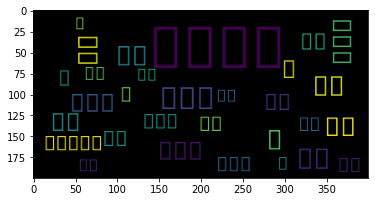

In [16]:
plt.imshow(nouns_wordcloud)

## CountVectorizer

**TF-IDF 역빈도**  : 빈도수가 희박한 단어가 이 문장을 대표할 수 있지 않을까?


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

In [19]:
countervectorizer = CountVectorizer()
countervectorizer.fit_transform(corpus).toarray()  # toarray(): 배열 형태로 출력

array([[0, 1, 0, 1, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 0, 1, 0, 0]])

In [20]:
print(countervectorizer.vocabulary_)

{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
tfidf = TfidfVectorizer()
tfidf.fit_transform(corpus).toarray()

# 숫자가 큼-> 전체 문장에서 대표하는 단어임

array([[0.        , 0.46735098, 0.        , 0.46735098, 0.        ,
        0.46735098, 0.        , 0.35543247, 0.46735098],
       [0.        , 0.        , 0.79596054, 0.        , 0.        ,
        0.        , 0.        , 0.60534851, 0.        ],
       [0.57735027, 0.        , 0.        , 0.        , 0.57735027,
        0.        , 0.57735027, 0.        , 0.        ]])

In [23]:
print(tfidf.vocabulary_)

{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


## Word2Vec

In [24]:
from gensim.models import Word2Vec

In [28]:
word2vec = Word2Vec([posts_noun], min_count=10)
word2vec

In [29]:
word2vec.wv.most_similar('삼성')

[('스마트폰', 0.9997950792312622),
 ('위', 0.9997504949569702),
 ('갤럭시', 0.9997378587722778),
 ('스펙', 0.9997367858886719),
 ('사용', 0.9997211694717407),
 ('안드로이드', 0.9996975064277649),
 ('강', 0.9996968507766724),
 ('화웨이', 0.9996953010559082),
 ('강의', 0.9996919631958008),
 ('정리', 0.9996905326843262)]